In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [2]:
df = pd.read_csv("data/student-exam-expanded.csv")
print(df.shape)
df.head()

(30641, 15)


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [5]:
num_cols: list[str] = df.select_dtypes(exclude="O").columns.tolist()
cat_cols: list[str] = df.select_dtypes(include="O").columns.tolist()

cat_cols, num_cols

(['Gender',
  'EthnicGroup',
  'ParentEduc',
  'LunchType',
  'TestPrep',
  'ParentMaritalStatus',
  'PracticeSport',
  'IsFirstChild',
  'TransportMeans',
  'WklyStudyHours'],
 ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore'])

In [6]:
for_ord_encoding = ["ParentEduc", "LunchType", "TransportMeans", "WklyStudyHours"]
for_ohe_encoding = ["TestPrep", "Gender", "EthnicGroup"]

We need to map the categorical features in order to work with them easily.

In [7]:
# Print unique values of every columns
for col in cat_cols:
    print(f"{col} = {df[col].unique().tolist()}")

Gender = ['female', 'male']
EthnicGroup = [nan, 'group C', 'group B', 'group A', 'group D', 'group E']
ParentEduc = ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school', nan]
LunchType = ['standard', 'free/reduced']
TestPrep = ['none', nan, 'completed']
ParentMaritalStatus = ['married', 'single', 'widowed', nan, 'divorced']
PracticeSport = ['regularly', 'sometimes', 'never', nan]
IsFirstChild = ['yes', 'no', nan]
TransportMeans = ['school_bus', nan, 'private']
WklyStudyHours = ['< 5', '5 - 10', '> 10', nan]


In [8]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

Gender                    0
EthnicGroup               0
ParentEduc                0
LunchType                 0
TestPrep                  0
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
NrSiblings             1572
TransportMeans            0
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [10]:
# # Now map all the unique values of the columns
# ord_encoder = OrdinalEncoder()
# ord_encoded = pd.DataFrame(ord_encoder.fit_transform(df[for_ord_encoding])).astype(int)

# ohe_encoder = OneHotEncoder(drop="first", sparse_output=False)
# ohe_encoded = pd.DataFrame(ohe_encoder.fit_transform(df[for_ohe_encoding])).astype(int)

In [11]:
# ord_encoded.shape, ohe_encoded.shape

In [12]:
# df = pd.concat([df, ord_encoded, ohe_encoded], axis=1)
# df.shape

In [13]:
ord_encoder = OrdinalEncoder()
ord_encoded = pd.DataFrame(ord_encoder.fit_transform(df[for_ord_encoding])).astype(int)

In [14]:
df[for_ord_encoding] = ord_encoded

In [15]:
dummies = []
for col in for_ohe_encoding:
    dummies.append(pd.get_dummies(df[col], prefix=f"{col}", drop_first=True, sparse=False))

In [52]:
OneHotEncoder(drop='first', sparse_output=False).fit_transform(df["Gender"].to_numpy().reshape(-1, 1))

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [57]:
pd.get_dummies(df["EthnicGroup"], prefix="Gender")

,Gender_group A,Gender_group B,Gender_group C,Gender_group D,Gender_group E
0,False,False,True,False,False
1,False,False,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,True,False,False
...,...,...,...,...,...
30636,False,False,False,True,False
30637,False,False,False,False,True
30638,False,False,True,False,False
30639,False,False,False,True,False


In [56]:
pd.get_dummies(df["EthnicGroup"], drop_first=True, prefix="Gender")

,Gender_group B,Gender_group C,Gender_group D,Gender_group E
0,False,True,False,False
1,False,True,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
...,...,...,...,...
30636,False,False,True,False
30637,False,False,False,True
30638,False,True,False,False
30639,False,False,True,False


In [16]:
final_df = pd.concat([df, *dummies], axis=1)

In [17]:
final_df.drop(columns=cat_cols, inplace=True)

In [18]:
final_df["NrSiblings"].fillna(df["NrSiblings"].mode()[0], inplace=True)

In [19]:
print(final_df.shape)
final_df.head()

(30641, 10)


,NrSiblings,MathScore,ReadingScore,WritingScore,TestPrep__none,Gender__male,EthnicGroup__group B,EthnicGroup__group C,EthnicGroup__group D,EthnicGroup__group E
0,3.0,71,71,74,True,False,False,True,False,False
1,0.0,69,90,88,True,False,False,True,False,False
2,4.0,87,93,91,True,False,True,False,False,False
3,1.0,45,56,42,True,True,False,False,False,False
4,0.0,76,78,75,True,True,False,True,False,False


In [20]:
corr = final_df.corr()

<Axes: >

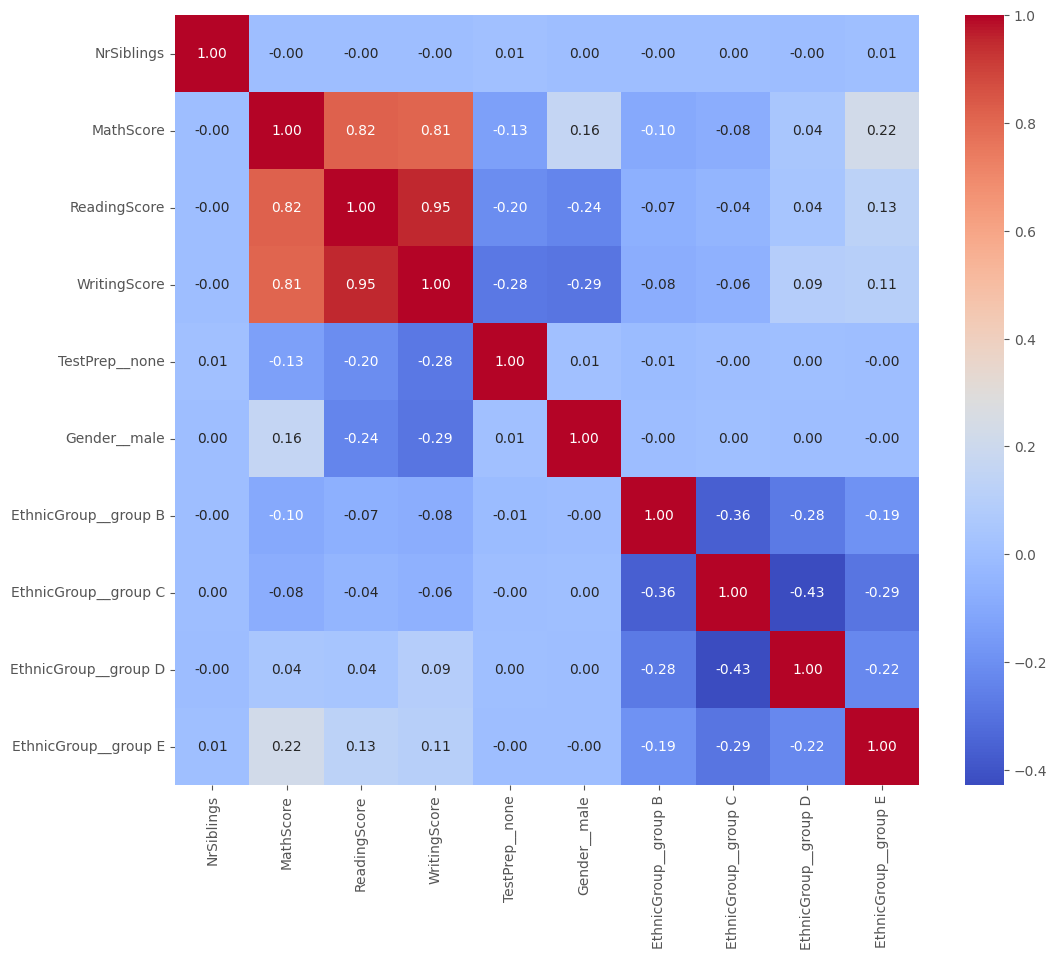

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NrSiblings            30641 non-null  float64
 1   MathScore             30641 non-null  int64  
 2   ReadingScore          30641 non-null  int64  
 3   WritingScore          30641 non-null  int64  
 4   TestPrep__none        30641 non-null  bool   
 5   Gender__male          30641 non-null  bool   
 6   EthnicGroup__group B  30641 non-null  bool   
 7   EthnicGroup__group C  30641 non-null  bool   
 8   EthnicGroup__group D  30641 non-null  bool   
 9   EthnicGroup__group E  30641 non-null  bool   
dtypes: bool(6), float64(1), int64(3)
memory usage: 1.1 MB


## Model Building

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
target_cols = ["MathScore", "WritingScore", "ReadingScore"]

In [30]:
X = final_df.drop(columns=target_cols)

math_score = final_df.drop(columns=["MathScore"])
reading_score = final_df.drop(columns=["ReadingScore"])
writing_score = final_df.drop(columns=["WritingScore"])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    final_df.drop(columns=["MathScore"]), math_score, test_size=0.25, random_state=42
)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

(1.0, 1.1949805996614286e-27)